# 1. Setup and Data Loading

This first block imports all the necessary libraries for data handling, visualization, traditional and deep learning models, as well as for building an interactive user interface.

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import time
import warnings
warnings.filterwarnings('ignore')

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from copy import deepcopy

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# TensorFlow / Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# JAX / Flax / Optax
import jax
import jax.numpy as jnp
from flax import nnx
import optax

# Interactive Widgets
import ipywidgets as widgets
from ipywidgets import interact

# Google Colab File Upload
from google.colab import files

# Excel File Reading
import openpyxl  # Required to read .xlsx files with pandas (if not already available)

# Upload file
uploaded = files.upload()

# Load dataset
df = pd.read_excel("DATASET.xlsx")
df.head()

# Print feature names
print("""The variables present in the dataset are the following:

- X1: Relative Compactness
- X2: Surface Area
- X3: Wall Area
- X4: Roof Area
- X5: Overall Height
- X6: Orientation
- X7: Glazing Area
- X8: Glazing Area Distribution
- Y1: Heating Load
""")

Saving DATASET.xlsx to DATASET.xlsx
The variables present in the dataset are the following:

- X1: Relative Compactness
- X2: Surface Area
- X3: Wall Area
- X4: Roof Area
- X5: Overall Height
- X6: Orientation
- X7: Glazing Area
- X8: Glazing Area Distribution
- Y1: Heating Load



# 2. Data Exploration

In this section, a preliminary analysis of the dataset is carried out to better understand the structure and relationships among the variables. First, basic descriptive statistics are computed to evaluate the distribution of the data. Then, a correlation matrix is plotted to highlight potential linear relationships between features, especially with respect to the target variable Y1 (Heating Load). Lastly, a pairplot is used on a sample of 100 data points to visually inspect the interactions and distributions of the main variables.

In [2]:
# Descriptive statistics
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000


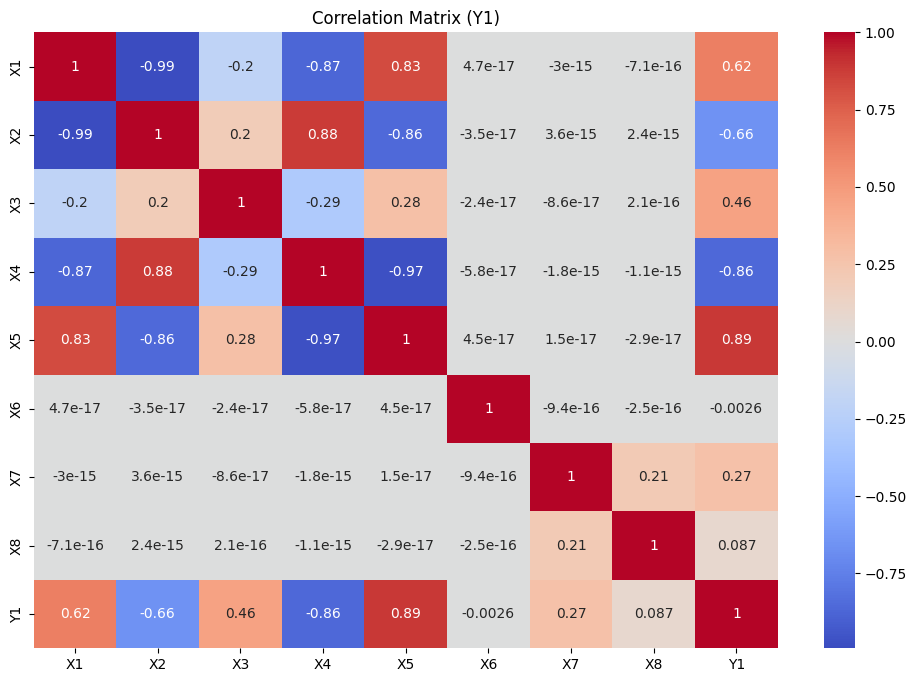

In [3]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (Y1)")
plt.show()

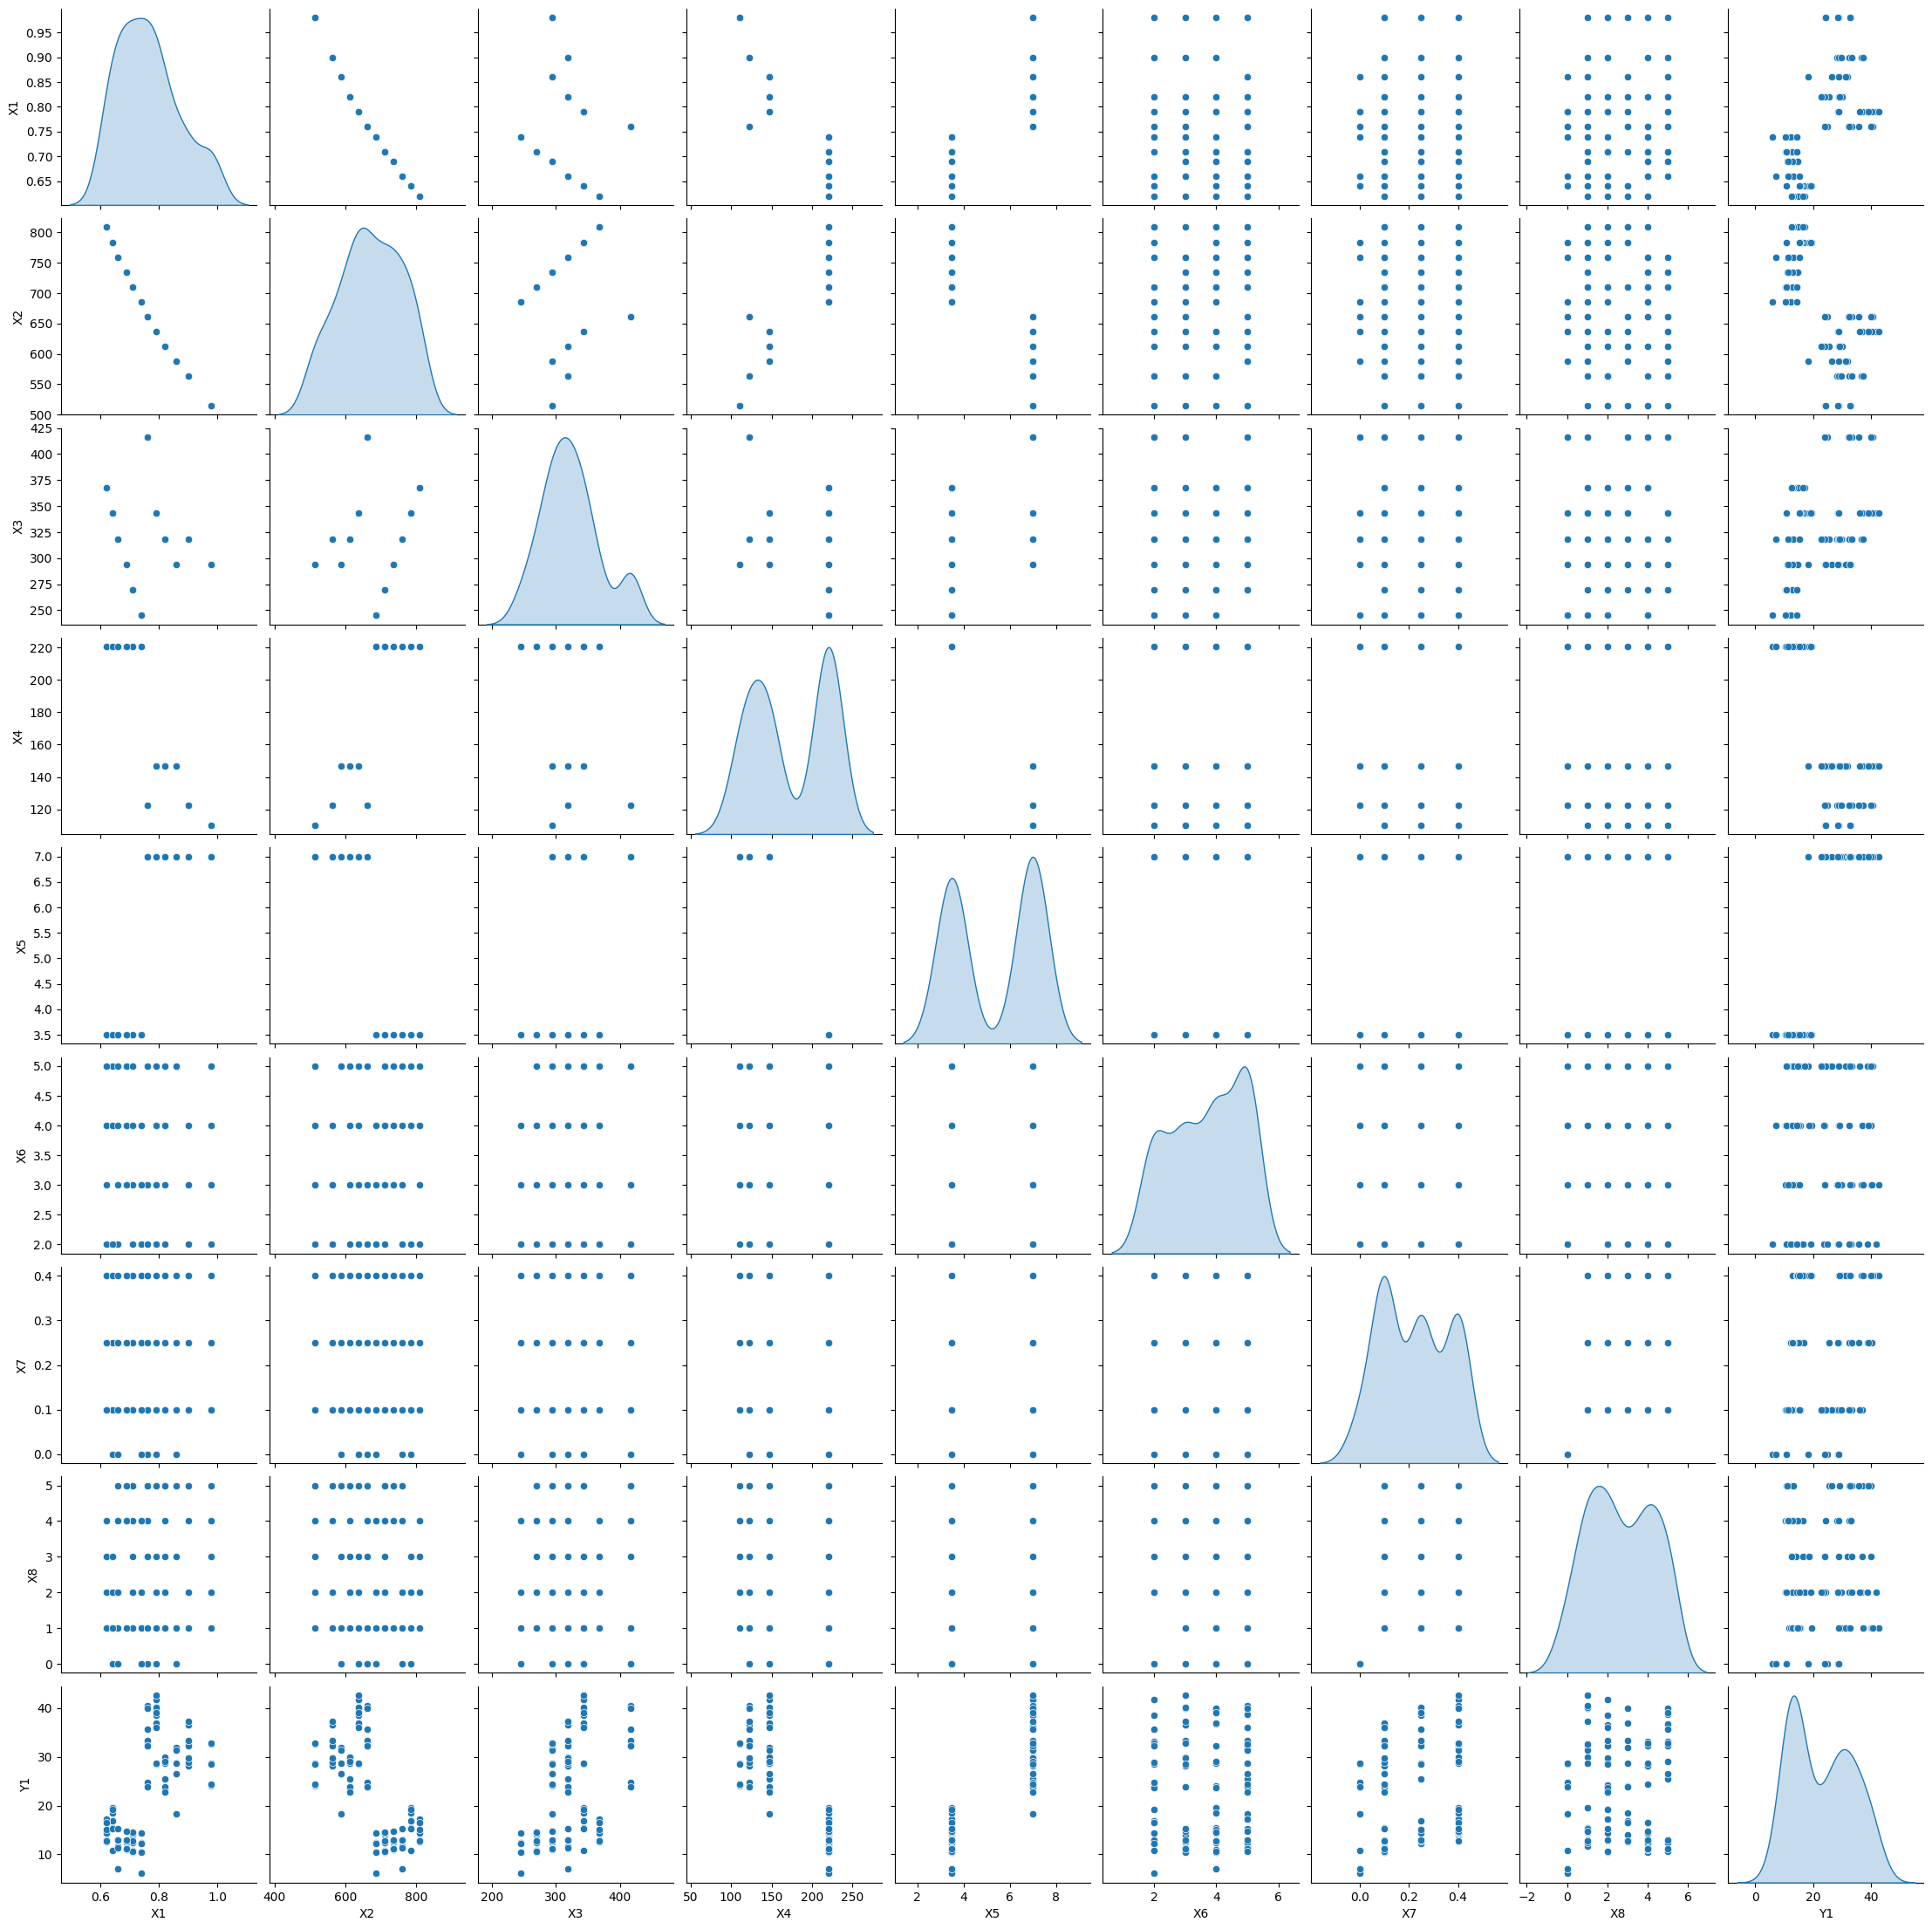

In [4]:
# Pairplot of a sample
sns.pairplot(df.sample(100), diag_kind='kde')
plt.show()

# 3. Preprocessing

This block performs a crucial data cleaning step to ensure the dataset is ready for model training. It starts by checking for the presence of missing or infinite values, which could negatively impact model performance. Any rows containing such values are removed. The cleaned dataset is then converted into a NumPy array and split into input features (X) and the target variable Y1 (Heating Load).

In [5]:
# Check for NaN or infinite values
print("Missing values per column:\n", df.isnull().sum())
print("\nPresence of infinite values:\n", np.isinf(df).sum())

# Remove any rows with NaN or infinite values
df = df.replace([np.inf, -np.inf], np.nan).dropna()

# Convert to NumPy array
data = df.values

# Split features (X) and target (y1)
X = data[:, :-1]   # All columns except the last one (Y1)
y = data[:, -1]    # Last column (Y1)

Missing values per column:
 X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
dtype: int64

Presence of infinite values:
 X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
dtype: int64


# 4. ANN for Y1

This section defines, initializes, and trains a custom neural network using the Flax/NNX library with JAX. The dataset is loaded and split into training and validation sets, which are then converted into JAX-compatible arrays. A neural network architecture with two hidden layers is defined, using the sigmoid activation function. The model is trained for 10,000 epochs using the Mean Squared Error (MSE) as the loss function and the Adam optimizer. Throughout training, the model’s performance on both training and validation sets is monitored, and a final loss curve is plotted to visualize the learning process over time.

epoch:     0, loss_train: 6.163e+02, loss_valid: 6.548e+02
epoch:   100, loss_train: 5.396e+02, loss_valid: 5.753e+02
epoch:   200, loss_train: 4.774e+02, loss_valid: 5.107e+02
epoch:   300, loss_train: 4.264e+02, loss_valid: 4.577e+02
epoch:   400, loss_train: 3.811e+02, loss_valid: 4.105e+02
epoch:   500, loss_train: 3.399e+02, loss_valid: 3.672e+02
epoch:   600, loss_train: 2.978e+02, loss_valid: 3.230e+02
epoch:   700, loss_train: 2.630e+02, loss_valid: 2.862e+02
epoch:   800, loss_train: 2.338e+02, loss_valid: 2.552e+02
epoch:   900, loss_train: 2.060e+02, loss_valid: 2.254e+02
epoch:  1000, loss_train: 1.819e+02, loss_valid: 1.995e+02
epoch:  1100, loss_train: 1.609e+02, loss_valid: 1.766e+02
epoch:  1200, loss_train: 1.452e+02, loss_valid: 1.592e+02
epoch:  1300, loss_train: 1.336e+02, loss_valid: 1.461e+02
epoch:  1400, loss_train: 1.248e+02, loss_valid: 1.361e+02
epoch:  1500, loss_train: 1.181e+02, loss_valid: 1.283e+02
epoch:  1600, loss_train: 1.131e+02, loss_valid: 1.223e+

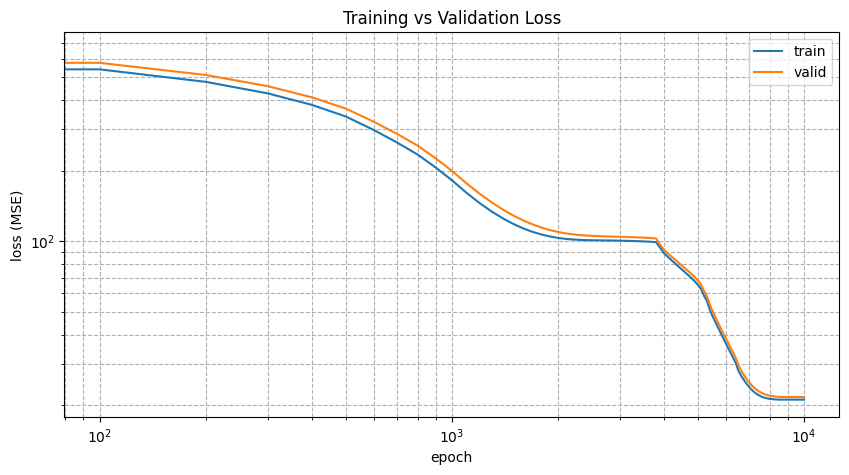

In [6]:
# Start timer to measure execution time
t_ini = time.time()

# Number of input and output variables
num_input = 8   # X1 to X8
num_output = 1  # solo Y1

# Load the data
data = pd.read_excel("DATASET.xlsx").values

# Split into input features and output
X_data = data[:, :-1]  # X1 to X8
Y_data = data[:, -1:]  # only Y1

# Split in training and validation sets
X_train, X_valid, Y_train, Y_valid = train_test_split(X_data, Y_data, test_size=0.2, random_state=42)

# Convert to JAX arrays
X_train = jnp.array(X_train)
X_valid = jnp.array(X_valid)
Y_train = jnp.array(Y_train)
Y_valid = jnp.array(Y_valid)

# Model definition
class NN(nnx.Module):
    def __init__(self, rngs: nnx.Rngs):
        self.linear1 = nnx.Linear(num_input, 16, rngs=rngs)
        self.linear2 = nnx.Linear(16, 16, rngs=rngs)
        self.linear3 = nnx.Linear(16, num_output, rngs=rngs)

    def __call__(self, x):
        x = self.linear1(x)
        x = nnx.sigmoid(x)
        x = self.linear2(x)
        x = nnx.sigmoid(x)
        x = self.linear3(x)
        return x

# Model initialization
model = NN(rngs=nnx.Rngs(0))

# Loss function (MSE)
@nnx.jit
def loss(mod, X, Y):
    prediction = mod(X)
    return jnp.mean((prediction - Y)**2)

# Training settings
num_epochs = 10000
learning_rate = 1e-3

# Optimizer
optimizer = nnx.Optimizer(model, optax.adam(learning_rate=learning_rate))

# Training step function
@nnx.jit
def train_step(mod, opt, X, Y):
    grad_fn = nnx.grad(loss)
    grads = grad_fn(mod, X, Y)
    opt.update(grads)

# Logging
log_epochs = []
log_loss_train = []
log_loss_valid = []

def log(epoch):
    loss_train = loss(model, X_train, Y_train)
    loss_valid = loss(model, X_valid, Y_valid)
    log_epochs.append(epoch)
    log_loss_train.append(loss_train)
    log_loss_valid.append(loss_valid)
    print(f'epoch: {epoch:>5}, loss_train: {loss_train:0.3e}, loss_valid: {loss_valid:0.3e}')

# Training loop
for epoch in range(num_epochs):
    if epoch % 100 == 0:
        log(epoch)
    train_step(model, optimizer, X_train, Y_train)
log(num_epochs)

# Execution time
t_end = time.time()
print(f'elapsed time: {t_end - t_ini:.3f} s')

# Loss plot
plt.figure(figsize=(10, 5))
plt.loglog(log_epochs, log_loss_train, label='train')
plt.loglog(log_epochs, log_loss_valid, label='valid')
plt.xlabel('epoch')
plt.ylabel('loss (MSE)')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()


# 5. Feature Importance – NNX Model

In this section, permutation feature importance is used to assess the contribution of each input variable (X1–X8) in predicting the heating load (Y1) using the trained NNX model. After scaling the data and evaluating the model on the validation set, each feature is randomly permuted to measure its effect on the prediction error. The results, shown in a horizontal bar chart, highlight which variables have the greatest impact on model performance.

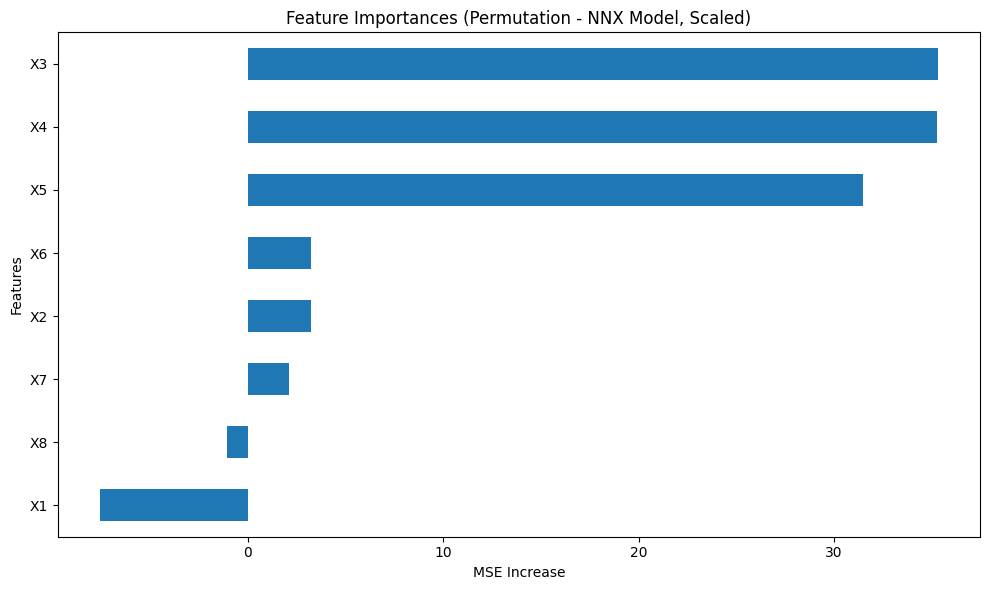

In [7]:
from copy import deepcopy

X_raw = X_data.copy()
scaler_X = StandardScaler()
scaler_X.fit(X_data)
# Compute baseline with validated and scaled data
X_valid_np = scaler_X.transform(np.array(X_valid))
Y_valid_np = np.array(Y_valid)

baseline_preds = model(jnp.array(X_valid_np)).squeeze()
baseline_mse = mean_squared_error(Y_valid_np, np.array(baseline_preds))

# Dictionary for importances
feature_importance = {}

# For each feature, permute, scale, and evaluate the loss
for i, feature_name in enumerate(["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8"]):
    X_permuted = deepcopy(X_valid_np)
    np.random.shuffle(X_permuted[:, i])  # Shuffle feature i
    preds_permuted = model(jnp.array(X_permuted)).squeeze()
    mse_permuted = mean_squared_error(Y_valid_np, np.array(preds_permuted))
    feature_importance[feature_name] = mse_permuted - baseline_mse

# Visualization
importances_series = pd.Series(feature_importance).sort_values()
importances_series.plot(kind='barh', figsize=(10, 6))
plt.title("Feature Importances (Permutation - NNX Model, Scaled)")
plt.xlabel("MSE Increase")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


# 6. Monte Carlo Simulation

This section performs a Monte Carlo simulation to evaluate the uncertainty in the prediction of the heating load (Y1). Small random perturbations (noise) are applied to the input features, simulating variability in real-world measurements. For each perturbed dataset, the trained NNX model generates a prediction. After running the simulation 1,000 times, the resulting distribution of Y1 predictions is visualized using a histogram with a kernel density estimate. This allows a better understanding of the model's robustness and the expected variation in its outputs.

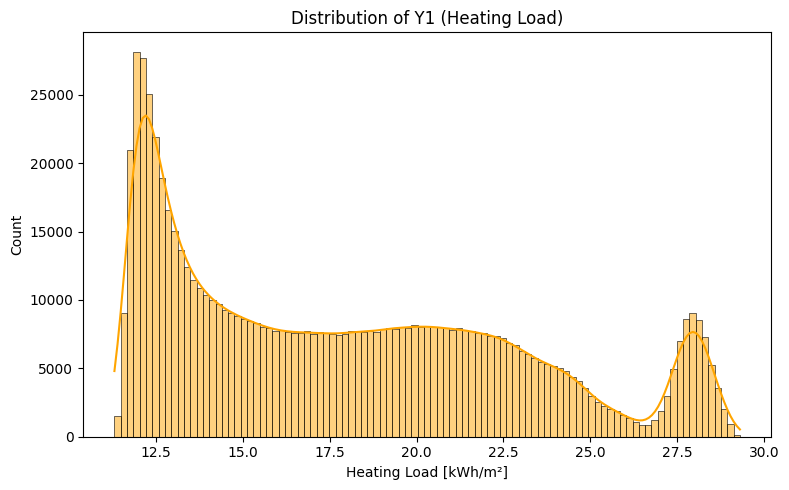

In [8]:
# Load and scale
data = pd.read_excel("DATASET.xlsx").values
X_data = data[:, :-1]   # Features
Y_data = data[:, -1:]   # Only Y1

# Raw copy and normalization
X_raw = X_data.copy()
scaler_X = StandardScaler()
scaler_X.fit(X_data)

# Monte Carlo simulation (Y1)
def monte_carlo_predict(model, X_orig, scaler_X, num_sim=1000, noise_std=0.05):
    np.random.seed(0)
    preds = []
    for _ in range(num_sim):
        X_noisy = X_orig + np.random.normal(0, noise_std, X_orig.shape)
        X_scaled = scaler_X.transform(X_noisy)
        X_jax = jnp.array(X_scaled)
        Y_pred = model(X_jax)
        preds.append(np.array(Y_pred))
    return np.stack(preds)

# Run the simulation
mc_results = monte_carlo_predict(model, X_raw, scaler_X, num_sim=1000)

# Y1 predictions
y1_samples = mc_results[:, :, 0].flatten()

# Plotting Y1 distribution
plt.figure(figsize=(8, 5))
sns.histplot(y1_samples, kde=True, color="orange")
plt.title("Distribution of Y1 (Heating Load)")
plt.xlabel("Heating Load [kWh/m²]")
plt.tight_layout()
plt.show()

# 7. Implementation for users

In this final section, a user-friendly interface is created to allow users to estimate the heating load (Y1) based on custom input parameters. The function first normalizes the user's inputs using the same scaling applied during model training, ensuring consistency. Then, the trained NNX model predicts the heating load using these inputs.
The interface, built with interactive widgets, makes it easy for non-technical users to experiment with different input values and instantly view the corresponding prediction, expressed in kWh/m².

In [9]:
# Normalization: fit only on the full dataset
scaler = StandardScaler()
scaler.fit(X_data)

# Prediction function using the trained NNX model
def predict_heating_nnx(inputs):
    inputs_scaled = scaler.transform(inputs)
    inputs_scaled_jax = jnp.array(inputs_scaled)
    prediction = model(inputs_scaled_jax)
    return float(np.array(prediction).squeeze())

# Function linked to the widgets
def on_predict(x1, x2, x3, x4, x5, x6, x7, x8):
    # Prepare the data in 2D array form
    user_input = np.array([[x1, x2, x3, x4, x5, x6, x7, x8]])

    # Prediction using the NNX model
    y1_pred = predict_heating_nnx(user_input)

    # Print the result
    print(f"\nNNX model prediction:")
    print(f"Heating Load (Y1): {y1_pred:.2f} kWh/m²")

# Widgets for user input
x1_widget = widgets.FloatText(description='X1 - Compactness:', value=0.75)
x2_widget = widgets.FloatText(description='X2 - Surface Area:', value=750)
x3_widget = widgets.FloatText(description='X3 - Wall Area:', value=300)
x4_widget = widgets.FloatText(description='X4 - Roof Area:', value=200)
x5_widget = widgets.FloatText(description='X5 - Height:', value=3.5)
x6_widget = widgets.IntSlider(description='X6 - Orientation:', min=1, max=4, value=2)
x7_widget = widgets.FloatText(description='X7 - Glazing Area:', value=0.1)
x8_widget = widgets.IntSlider(description='X8 - Glazing Dist.:', min=0, max=5, value=0)

# Display the user interface
interact(on_predict,
         x1=x1_widget, x2=x2_widget, x3=x3_widget, x4=x4_widget,
         x5=x5_widget, x6=x6_widget, x7=x7_widget, x8=x8_widget)


interactive(children=(FloatText(value=0.75, description='X1 - Compactness:'), FloatText(value=750.0, descripti…

<function __main__.on_predict(x1, x2, x3, x4, x5, x6, x7, x8)>